In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from datetime import date

In [20]:
df = pd.read_csv('data/data.csv')

# Calculate 5 days moving average
df['sma_5'] = df.iloc[:,0].rolling(window=5).mean()
df['sma_14'] = df.iloc[:,0].rolling(window=14).mean()
df['sma_21'] = df.iloc[:,0].rolling(window=21).mean()

# df['date'] = pd.to_datetime(df['date'])

# Filter from lockdown 1.0 , i.e. 25 March
mask = (df['date'] >= '2020-03-25') # & (df['date'] < '2020-05-17')
df = df.loc[mask]
df.tail()

,dailyconfirmed,dailydeceased,dailyrecovered,date,totalconfirmed,totaldeceased,totalrecovered,sma_5,sma_14,sma_21
135,12039,309,8092,2020-06-13,321638,9198,162327,11123.4,9984.142857,9057.714286
136,11405,324,7358,2020-06-14,333043,9522,169685,11408.2,10171.000000,9262.190476
137,10032,396,10639,2020-06-15,343075,9918,180324,11183.4,10335.928571,9434.476190
138,11086,2004,7226,2020-06-16,354161,11922,187550,11173.6,10498.142857,9681.095238
139,13107,341,6889,2020-06-17,367268,12263,194439,11533.8,10742.285714,9960.190476


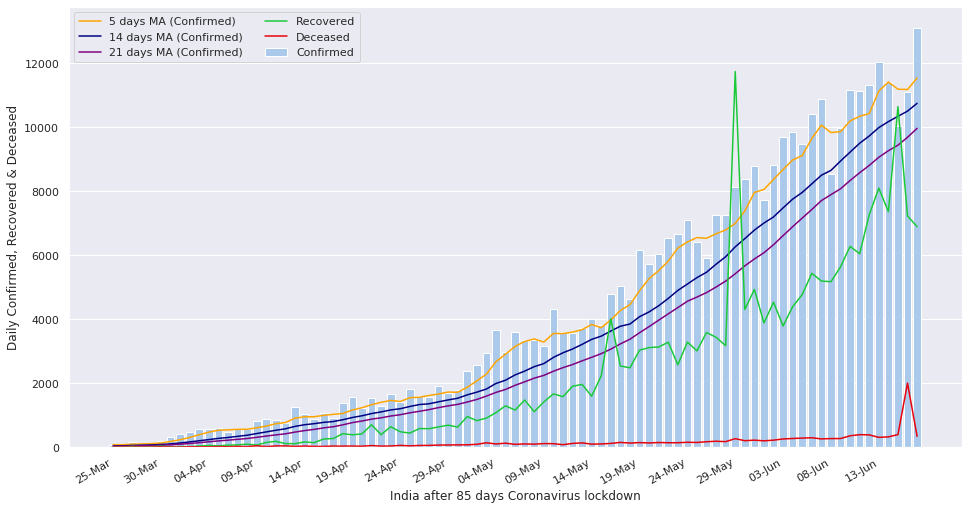

In [21]:
################################
# Daily plot

# Initialize the matplotlib figure
fig, axs = plt.subplots(figsize=(16, 9))

sns.set(style="darkgrid")

sns.set_color_codes("pastel")
sns.barplot(x=df.date, y=df.dailyconfirmed, color='b', label='Confirmed')

# Plot moving averages
sns.lineplot(x=df.date, y=df.sma_5, color='orange', label='5 days MA (Confirmed)')
sns.lineplot(x=df.date, y=df.sma_14, color='navy', label='14 days MA (Confirmed)')
sns.lineplot(x=df.date, y=df.sma_21, color='purple', label='21 days MA (Confirmed)')

sns.set_color_codes("bright")
sns.lineplot(x=df.date, y=df.dailyrecovered, color='g', label='Recovered')
sns.lineplot(x=df.date, y=df.dailydeceased, color='r', label='Deceased')

# handles,labels = axs.get_legend_handles_labels()
# handles = [handles[0], handles[1], handles[2], handles[3]]
# labels = [labels[0], labels[1], labels[2], labels[3]]

# set the frequency for labelling the xaxis
freq = int(5)

# set the xlabels as the datetime data for the given labelling frequency,
# also use only the date for the label

dt = df.iloc[::freq].date
dt = pd.to_datetime(dt).dt.strftime('%d-%b')
axs.set_xticklabels(dt)

# set the xticks at the same frequency as the xlabels
xtix = axs.get_xticks()
axs.set_xticks(xtix[::freq])

# nicer label format for dates
fig.autofmt_xdate()

# Add a legend and informative axis label
axs.legend(ncol=2, frameon=True, loc='upper left')
axs.set(ylabel="Daily Confirmed, Recovered & Deceased", xlabel= "India after " + str(len(df.index)) + " days Coronavirus lockdown")

plt.show()
fig.savefig('asset/daily.png')

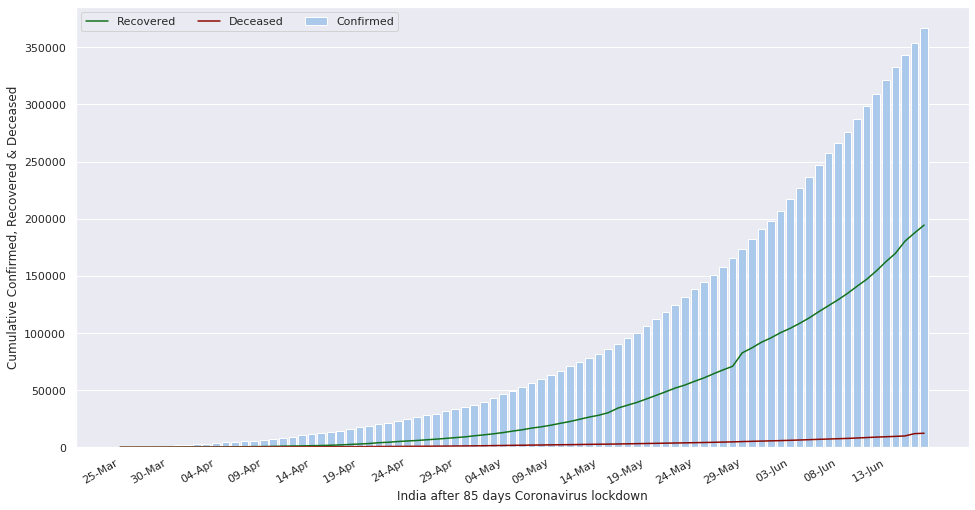

In [22]:
###############################
# Cumulative plot

# Initialize the matplotlib figure
fig, axs = plt.subplots(figsize=(16, 9))

sns.set_color_codes("pastel")
sns.barplot(x=df.date, y=df.totalconfirmed, color='b', label='Confirmed')
sns.set_color_codes("dark")
sns.lineplot(x=df.date, y=df.totalrecovered, color='g', label='Recovered')
sns.lineplot(x=df.date, y=df.totaldeceased, color='r', label='Deceased')

# set the frequency for labelling the xaxis
freq = int(5)

# set the xlabels as the datetime data for the given labelling frequency,
# also use only the date for the label

dt = df.iloc[::freq].date
dt = pd.to_datetime(dt).dt.strftime('%d-%b')
axs.set_xticklabels(dt)

# set the xticks at the same frequency as the xlabels
xtix = axs.get_xticks()
axs.set_xticks(xtix[::freq])

fig.autofmt_xdate()

# Add a legend and informative axis label
axs.legend(ncol=3, frameon=True)
axs.set(ylabel="Cumulative Confirmed, Recovered & Deceased", xlabel= "India after " + str(len(df.index)) + " days Coronavirus lockdown")

plt.show()
fig.savefig('asset/total.png')

In [23]:
###############################3
# Testing plot

# load data
df_tested = pd.read_csv('data/tested.csv')
df_tested['updatetimestamp'] = pd.to_datetime(df_tested['updatetimestamp'], dayfirst=True) #.format('%Y-%m-%d')
df_tested['daily_tested'] = df_tested['totalsamplestested'] - df_tested['totalsamplestested'].shift()

df_tested.tail(5)


,individualstestedperconfirmedcase,positivecasesfromsamplesreported,samplereportedtoday,source,testpositivityrate,testsconductedbyprivatelabs,testsperconfirmedcase,testspermillion,totalindividualstested,totalpositivecases,totalsamplestested,updatetimestamp,daily_tested
94,NaN,NaN,143737,https://twitter.com/ICMRDELHI/status/127165296...,NaN,NaN,NaN,4132.0,NaN,NaN,5507182.0,2020-06-13 09:00:00,143737.0
95,NaN,NaN,151432,https://t.me/Covid19india_Auxiliary_Test_Data/448,NaN,NaN,NaN,NaN,NaN,NaN,5658614.0,2020-06-14 09:00:00,151432.0
96,NaN,NaN,115519,https://t.me/Covid19india_Auxiliary_Test_Data/472,NaN,NaN,NaN,NaN,NaN,NaN,5774133.0,2020-06-15 09:00:00,115519.0
97,NaN,NaN,154935,https://t.me/Covid19india_Auxiliary_Test_Data/490,NaN,NaN,NaN,NaN,NaN,NaN,5921069.0,2020-06-16 09:00:00,146936.0
98,NaN,NaN,163187,https://t.me/Covid19india_Auxiliary_Test_Data/509,NaN,NaN,NaN,NaN,NaN,NaN,6084256.0,2020-06-17 09:00:00,163187.0


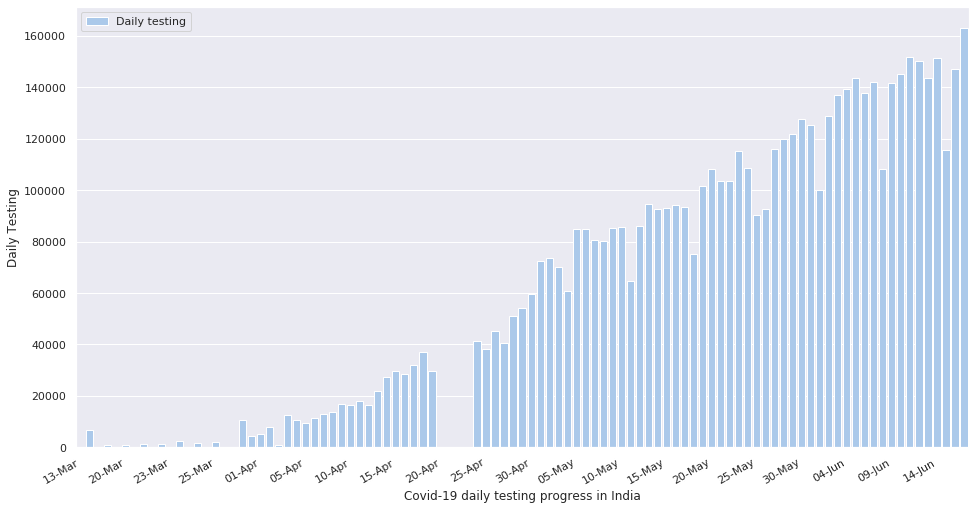

In [24]:

# Initialize the matplotlib figure
fig, axs = plt.subplots(figsize=(16, 9))

sns.set_color_codes("pastel")

# Plot testing data
sns.barplot(x=df_tested.updatetimestamp, y=df_tested.daily_tested, color='b', label='Daily testing')

# set the frequency for labelling the xaxis
freq = int(5)

# set the xlabels as the datetime data for the given labelling frequency,
# also use only the date for the label

dt = df_tested.iloc[::freq].updatetimestamp
dt = pd.to_datetime(dt).dt.strftime('%d-%b')
axs.set_xticklabels(dt)

# set the xticks at the same frequency as the xlabels
xtix = axs.get_xticks()
axs.set_xticks(xtix[::freq])

fig.autofmt_xdate()

# Add a legend and informative axis label
axs.legend(ncol=1, frameon=True, loc='upper left')
axs.set(ylabel="Daily Testing", xlabel= "Covid-19 daily testing progress in India")

plt.show()
fig.savefig('asset/testing.png')